# 线性回归

0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


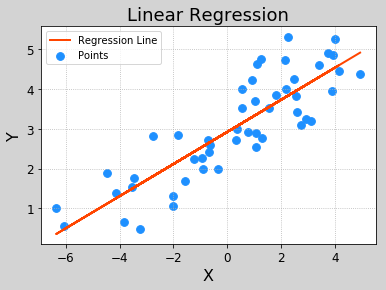

In [2]:
"""
线性回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练模型
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)

# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(x, pred_y, c='orangered', linewidth=2,
	label='Regression Line')
mp.legend()
mp.show()

# KNN算法
## KNN分类

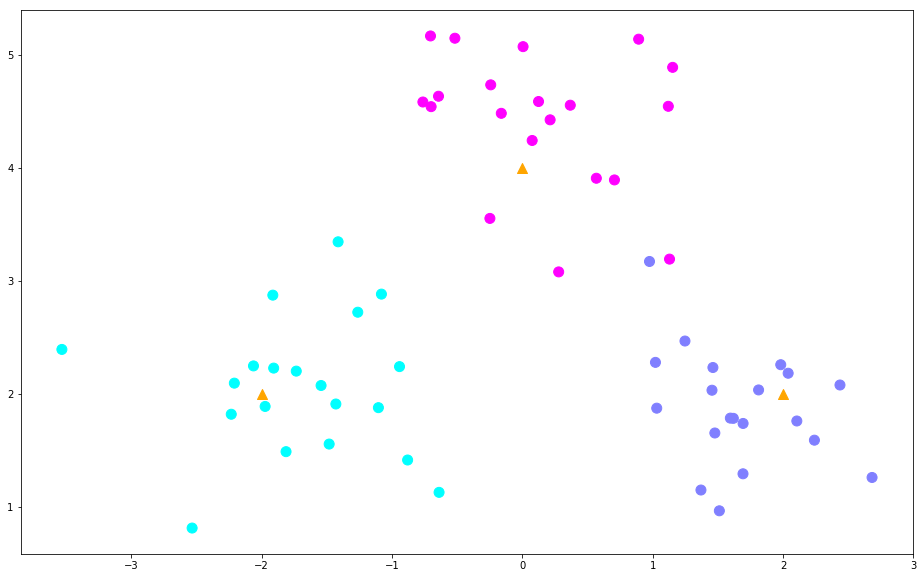

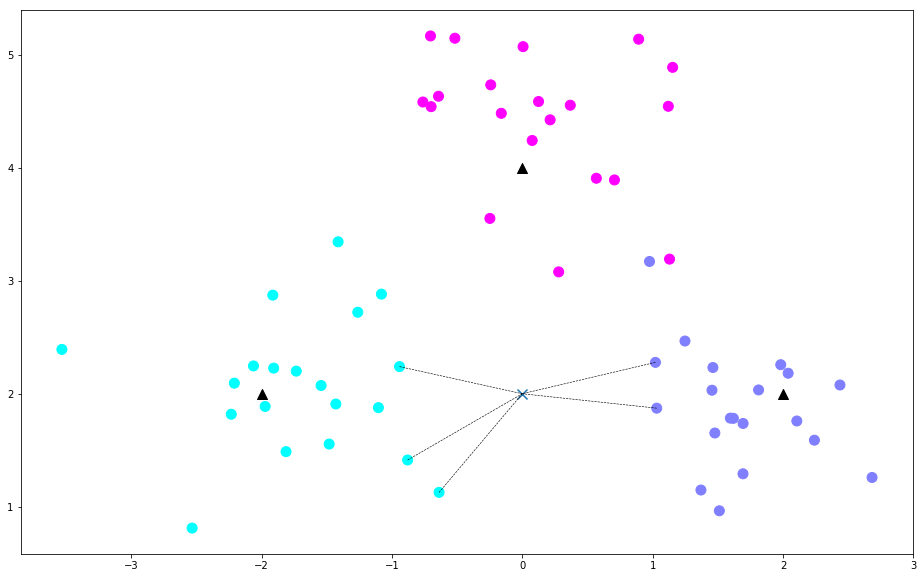

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
# 生成数据
centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)
# 画出数据
plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');         # 画出样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange');   # 画出中心点
from sklearn.neighbors import KNeighborsClassifier
# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y);
# 进行预测
X_sample = [0, 2]
X_sample = np.array(X_sample).reshape(1, -1)
y_sample = clf.predict(X_sample);
neighbors = clf.kneighbors(X_sample, return_distance=False);
# 画出示意图
plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')    # 样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x", 
            s=100, cmap='cool')    # 待预测的点

for i in neighbors[0]:
    # 预测点与距离最近的 5 个样本的连线
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 
             'k--', linewidth=0.6);

## KNN回归


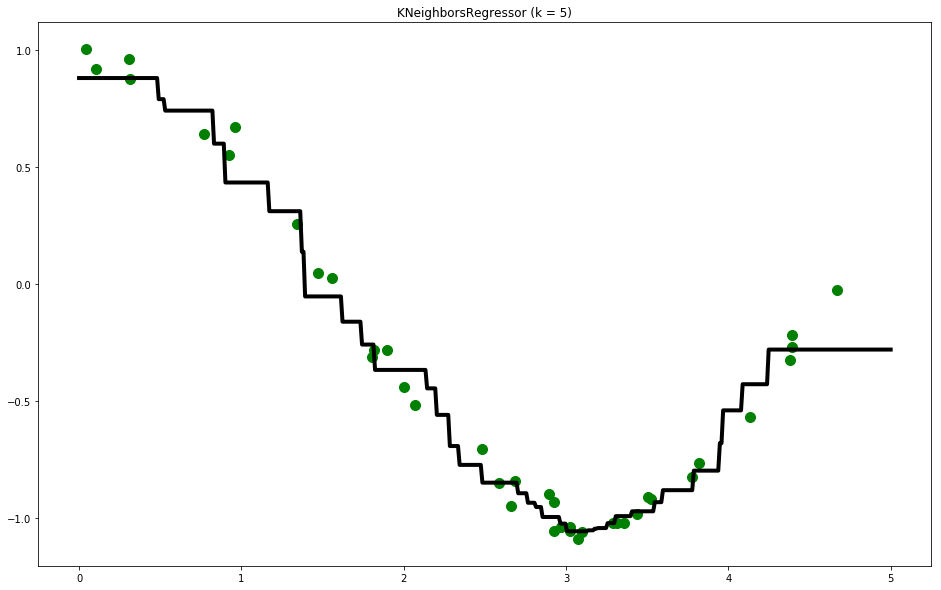

In [2]:
# 训练模型
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
# 生成训练样本
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()

# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y);
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)
# 画出拟合曲线
plt.figure(figsize=(16, 10))
plt.scatter(X, y, c='g', label='data', s=100)         # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 画出拟合曲线
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

## 案例（预测）

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 加载数据
data = pd.read_csv('src/diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [5]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print('shape of X {}; shape of Y {}'.format(X.shape, Y.shape))

shape of X (768, 8); shape of Y (768,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2);

In [7]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(
    n_neighbors=2, weights="distance")))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(
    n_neighbors=2, radius=500.0)))

In [8]:
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.6688311688311688
name: KNN with weights; score: 0.6623376623376623
name: Radius Neighbors; score: 0.6103896103896104


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))


name: KNN; cross val score: 0.7147641831852358
name: KNN with weights; cross val score: 0.6770505809979495
name: Radius Neighbors; cross val score: 0.6497265892002735


In [12]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.8322475570032574; test score: 0.6688311688311688


In [13]:
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6))
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes", 
                    X, Y, ylim=(0.0, 1.01), cv=cv);

ModuleNotFoundError: No module named 'common'

In [14]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [15]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights; cross val score: 0.6900375939849623
name: Radius Neighbors; cross val score: 0.6510252904989747


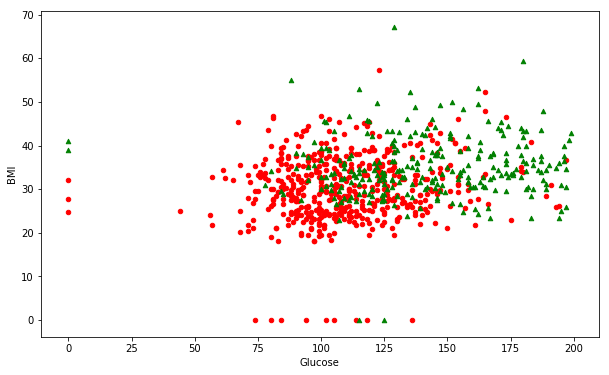

In [16]:
# 画出数据
plt.figure(figsize=(10, 6))
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='r', s=20, marker='o');         # 画出样本
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='g', s=20, marker='^');         # 画出样本